### Loan Prediction

### Dataset information and problem statement

#### Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir("C:\\Users\\abhin\\Downloads")

In [5]:
## loading the dataset
df = pd.read_csv("Loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Here we can observe that 5 variables are numerical rest are categorical

In [8]:
## checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
## check for duplicate values
duplicates = df.duplicated()
duplicates.sum()

0

In [10]:
## deleting the rows where Credit_History column has null values
df.dropna(subset=['Credit_History'],inplace=True)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.shape

(564, 13)

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,543.000000,550.000000,564.000000
mean,5466.436170,1530.448440,145.088398,342.152727,0.842199
std,6271.344106,2471.721359,83.309428,64.586272,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,100.000000,360.000000,1.000000
50%,3815.000000,1105.500000,127.000000,360.000000,1.000000
75%,5803.750000,2250.000000,165.500000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [15]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [16]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()  ### checking the null values after treatment

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

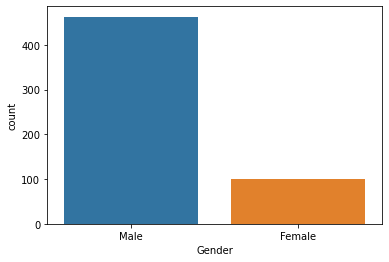

In [18]:
# categorical attributes visualization
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

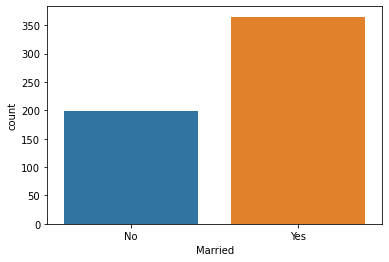

In [19]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

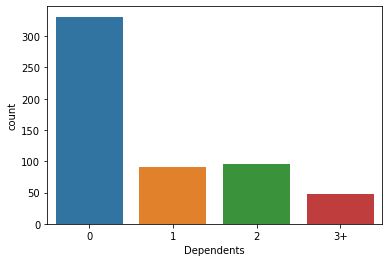

In [20]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

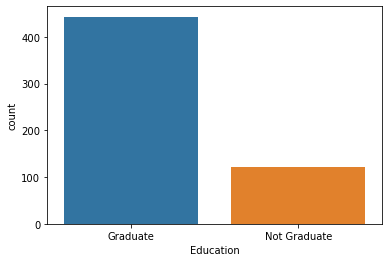

In [21]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

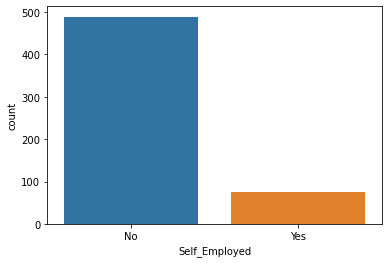

In [22]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

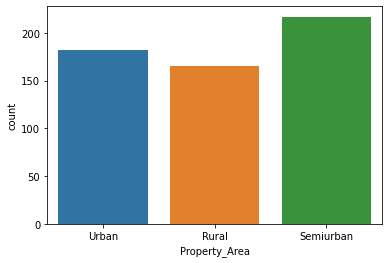

In [23]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

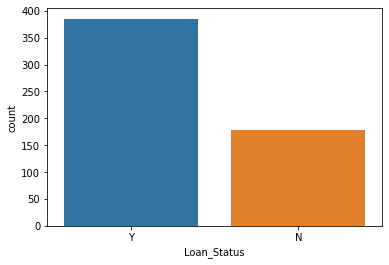

In [24]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

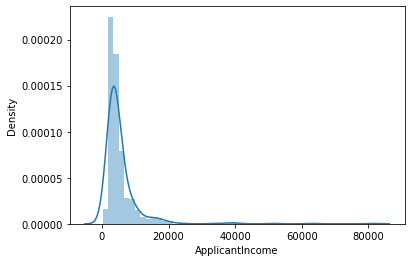

In [25]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

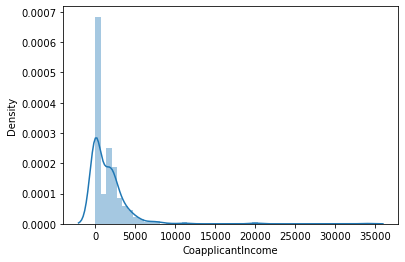

In [26]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

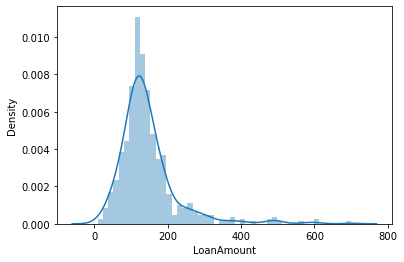

In [27]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

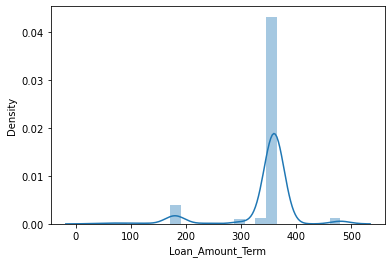

In [28]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

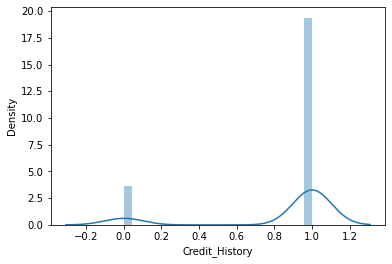

In [29]:
sns.distplot(df['Credit_History'])

In [30]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


#### Log transformation

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

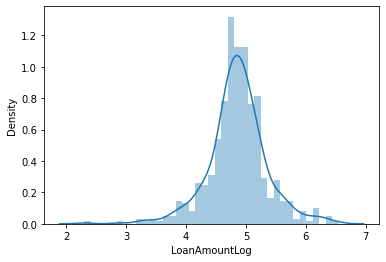

In [32]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

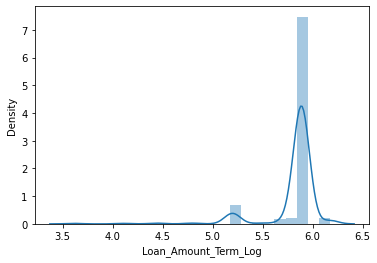

In [33]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

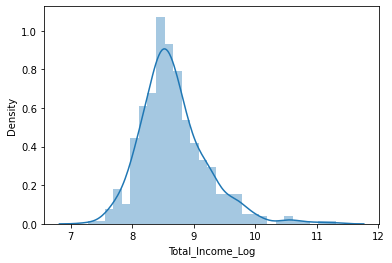

In [34]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

#### Correlation heatmap

<AxesSubplot:>

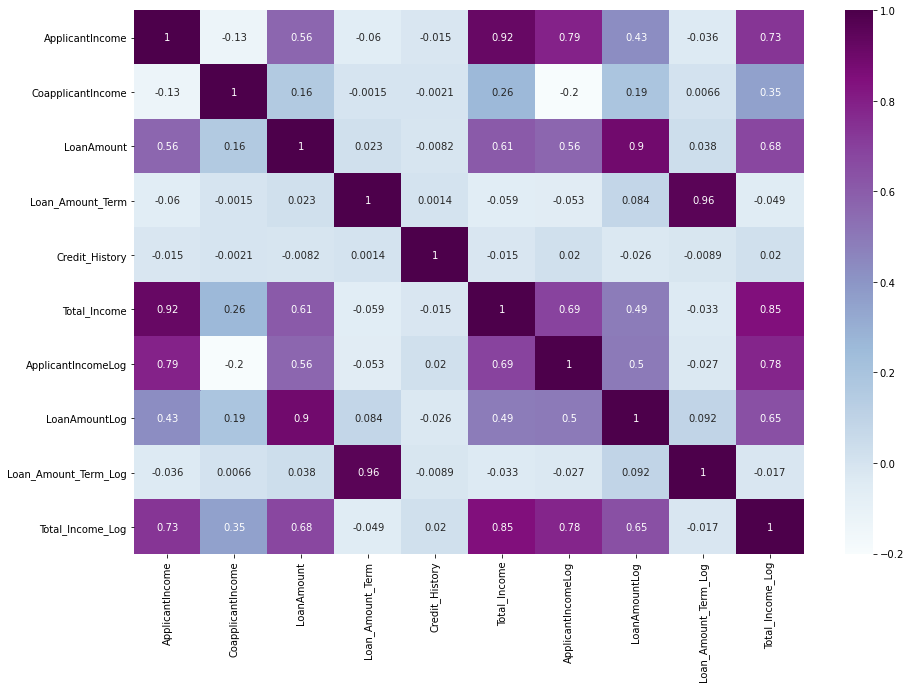

In [35]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y,5849.0,8.674197,4.984212,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [38]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.984212,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


#### change categorical variables to numerical using label encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.984212,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [41]:
df.shape

(564, 12)

#### train test split

In [42]:
# specify features and label
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Logistic regression model

In [44]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [45]:
### model fitting
model1.fit(x_train,y_train)

LogisticRegression()

In [46]:
preds1=model1.predict(x_test)

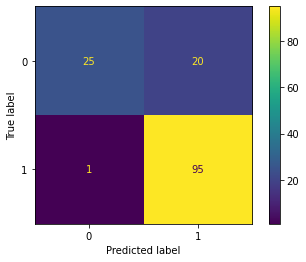

In [48]:
### model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve,roc_curve,auc
plot_confusion_matrix(model1,x_test,y_test)

In [49]:
print(classification_report(preds1,y_test))

              precision    recall  f1-score   support

           0       0.56      0.96      0.70        26
           1       0.99      0.83      0.90       115

    accuracy                           0.85       141
   macro avg       0.77      0.89      0.80       141
weighted avg       0.91      0.85      0.86       141



In [51]:
y_prob = model1.predict_proba(x_test)[:,1]

In [52]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7502314814814814

In [53]:
def plot_roc(roc_auc):
    plt.figure(figsize=(7,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

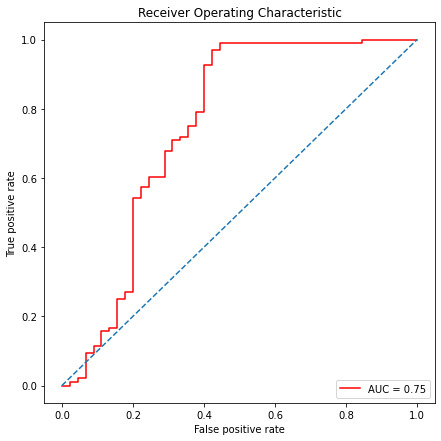

In [54]:
plot_roc(roc_auc)

In [77]:
score = cross_val_score(model1, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 81.56447534766119


#### Decision tree model

In [55]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [56]:
### model fitting
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
preds2=model2.predict(x_test)

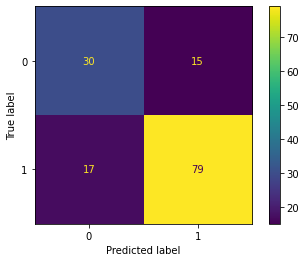

In [58]:
### model evaluation
plot_confusion_matrix(model2,x_test,y_test)

In [59]:
print(classification_report(preds2,y_test))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        47
           1       0.82      0.84      0.83        94

    accuracy                           0.77       141
   macro avg       0.74      0.74      0.74       141
weighted avg       0.77      0.77      0.77       141



In [60]:
y_prob = model2.predict_proba(x_test)[:,1]

In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7447916666666667

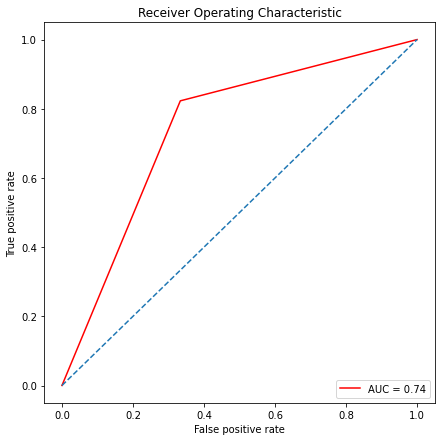

In [62]:
plot_roc(roc_auc)

#### Random forest classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [64]:
### model fitting
model3.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
preds3=model3.predict(x_test)

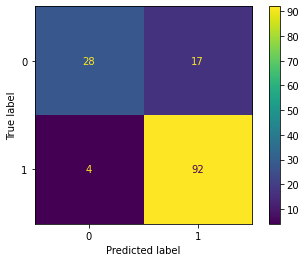

In [67]:
### model evaluation
plot_confusion_matrix(model3,x_test,y_test)

In [68]:
print(classification_report(preds3,y_test))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73        32
           1       0.96      0.84      0.90       109

    accuracy                           0.85       141
   macro avg       0.79      0.86      0.81       141
weighted avg       0.88      0.85      0.86       141



In [69]:
y_prob = model3.predict_proba(x_test)[:,1]

In [70]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8478009259259259

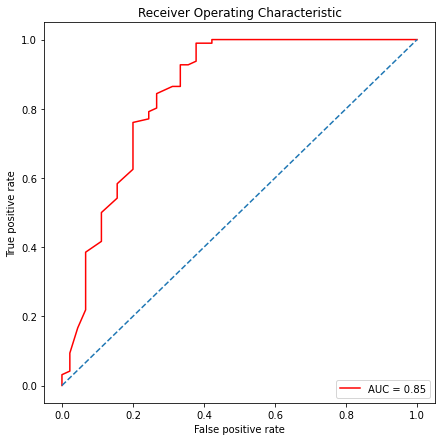

In [71]:
plot_roc(roc_auc)

In [72]:
### feature importances
model3.feature_importances_

array([0.01802813, 0.02513648, 0.04114146, 0.02765951, 0.01749878,
       0.24084359, 0.04782666, 0.1764516 , 0.17047603, 0.05155442,
       0.18338333])

In [76]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model3, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 78.01833122629583


#### Hyperparameter tuning

In [78]:
n_estimators=[10,25,60,100,125,150,200]
max_features= [2,3,4,8,11]
bootstrap = [True,False]
oob_score = [True,False]
max_depth=[5,7,10]

In [81]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score,
             'max_depth':max_depth}  # Note, oob_score only makes sense when bootstrap=True!

In [84]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model3,param_grid)

In [85]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 7, 10],
                         'max_features': [2, 3, 4, 8, 11],
                         'n_estimators': [10, 25, 60, 100, 125, 150, 200],
                         'oob_score': [True, False]})

In [86]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 4,
 'n_estimators': 10,
 'oob_score': False}

In [87]:
predictions = grid.predict(x_test)

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68        45
           1       0.83      0.93      0.88        96

    accuracy                           0.82       141
   macro avg       0.81      0.76      0.78       141
weighted avg       0.82      0.82      0.82       141



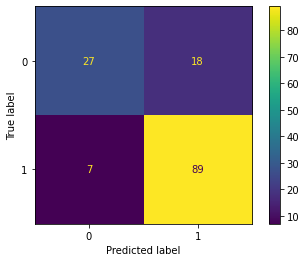

In [89]:
plot_confusion_matrix(grid,x_test,y_test)

In [90]:
Y_prob = grid.predict_proba(x_test)[:,1]

In [91]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.841087962962963

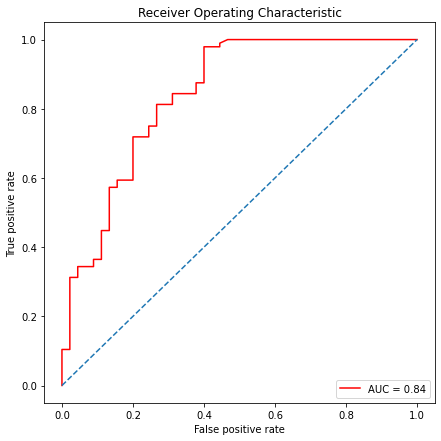

In [92]:
plot_roc(roc_auc)

### With higher accuracy, f1 and ROC AUC score we will choose Random forest classifier
### Accuracy score 85